<a href="https://colab.research.google.com/github/Lidiia-Afanasieva/ISSvsSteven/blob/main/ISSvsSteven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from PIL import Image
import os
from urllib.request import urlopen
import io
import seaborn as sns
import random

# Helper libraries
from IPython.core.pylabtools import figsize
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
# TO SHOW IMAGES PAIR

def magick(issaaaa, steeevaaa):
    global classes
    
    plt.figure(figsize=(8,8))

    for j, i in enumerate([issaaaa, steeevaaa]):
        plt.subplot(1, 2, j + 1)
        plt.title(classes[i[1]])
        plt.imshow(i[0])
        plt.axis('off')

In [4]:
# TO DOWNLOAD DATASET AND CHANGE SIZE

def download_set(data_path, class_name):
    global img_size
    only_img_list = []

    for img in os.listdir(data_path):
        img_arr =  cv2.imread(os.path.join(data_path, str(img)))
        # color channel conversion and circumcision))
        img_arr = cv2.cvtColor(cv2.resize(img_arr, dsize=(img_size, img_size)), cv2.COLOR_BGR2RGB)
        only_img_list.append(img_arr)

    return only_img_list

In [ ]:
img_size = 256

/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/MKC
602 0
/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена
520 1


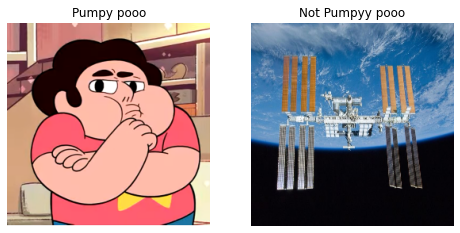

In [5]:
# FULL DATASET

full_ISS_dir = "/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/MKC"  # 602
full_Steven_dir = "/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена"  # 520

directory = [full_ISS_dir, full_Steven_dir]

classes = ['Not Pumpyy pooo', 'Pumpy pooo']

full_img_list = []
full_base = []

img_size = 256

train_base = []
test_base = []
temp_arr = []

only_img_list_tr = []
only_img_list_tt = []

for d_set_path in directory:
    print(d_set_path)  # debag
    os.chdir(d_set_path)
    current_class = 0 if '/MKC' in d_set_path else 1
    full_img_list.extend(download_set(os.getcwd(), current_class))
    temp_arr = download_set(os.getcwd(), current_class)
    print(len(temp_arr), current_class)  # debag
    full_base.extend([[i, current_class] for i in temp_arr])

magick(full_base[700], full_base[2])

random.shuffle(full_base)

In [ ]:
print(type(full_base[0][0]))

<class 'numpy.ndarray'>


In [6]:
# BUILDING A RIGHT ARRAY MODE

random.shuffle(full_base)

x_full = []
y_full = []

x_train = []
y_train = []

x_test = []
y_test = []

for img, cls in full_base:
    x_full.append(img)
    y_full.append(cls)

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(-1, img_size, img_size, 3)
x_train = x_train/255

x_test = x_test.reshape(-1, img_size, img_size, 3)
x_test = x_test/255

print(f'x_train shape is : {x_train.shape}')  # debag
print(f'x_test shape is : {x_test.shape}')  # debag

y_train = to_categorical(y_train, num_classes=2)
print(f'y_train shape is : {y_train.shape}')  # debag

y_test = to_categorical(y_test, num_classes = 2)

x_train shape is : (717, 256, 256, 3)
x_test shape is : (225, 256, 256, 3)
y_train shape is : (717, 2)


In [7]:
# THE COOOOLEST CODE IN THE WORLD
# COUSE ITS WORKING
# ACTUALLY ITS BUILD NN ARCHITECTURE AND OPTIMISE IT WITH ADAM

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)
print(f'x_train is : {len(x_train)}')  # debag
print(f'x_val is : {len(x_val)}')  # debag
print(f'y_train is : {len(y_train)}')  # debag
print(f'y_val is : {len(y_val)}')  # debag

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(img_size, img_size,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=0.000001, 
                             rotation_range=0.5, 
                             width_shift_range=0, 
                             height_shift_range=0, 
                             brightness_range=None, 
                             shear_range=0, 
                             zoom_range=0.5, 
                             channel_shift_range=0, 
                             fill_mode='nearest', 
                             cval=0, 
                             horizontal_flip=False, 
                             vertical_flip=False)

datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, steps_per_epoch=x_train.shape[0]//batch_size)

x_train is : 573
x_val is : 144
y_train is : 573
y_val is : 144
Epoch 1/10
17/17 [==============================] - 36s 2s/step - loss: 5.3859 - accuracy: 0.6470
Epoch 2/10
17/17 [==============================] - 33s 2s/step - loss: 0.2990 - accuracy: 0.9168
Epoch 3/10
17/17 [==============================] - 34s 2s/step - loss: 0.1975 - accuracy: 0.9409
Epoch 4/10
17/17 [==============================] - 44s 3s/step - loss: 0.1187 - accuracy: 0.9630
Epoch 5/10
17/17 [==============================] - 34s 2s/step - loss: 0.0657 - accuracy: 0.9815
Epoch 6/10
17/17 [==============================] - 37s 2s/step - loss: 0.0458 - accuracy: 0.9908
Epoch 7/10
17/17 [==============================] - 47s 3s/step - loss: 0.0359 - accuracy: 0.9852
Epoch 8/10
17/17 [==============================] - 36s 2s/step - loss: 0.0427 - accuracy: 0.9908
Epoch 9/10
17/17 [==============================] - 35s 2s/step - loss: 0.0244 - accuracy: 0.9926
Epoch 10/10
17/17 [==============================] - 3

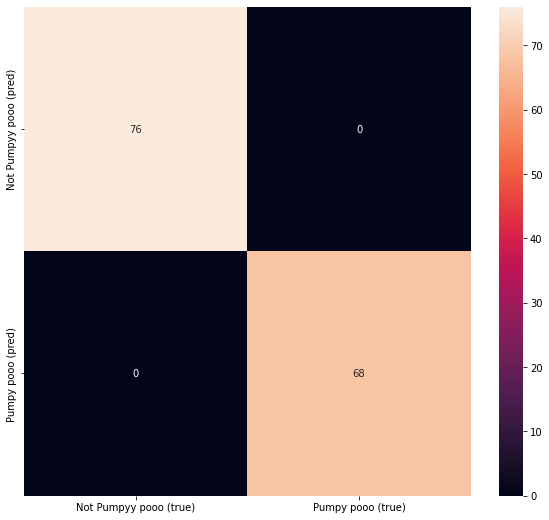

In [13]:
y_pred = model.predict(x_val)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_cls)
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()

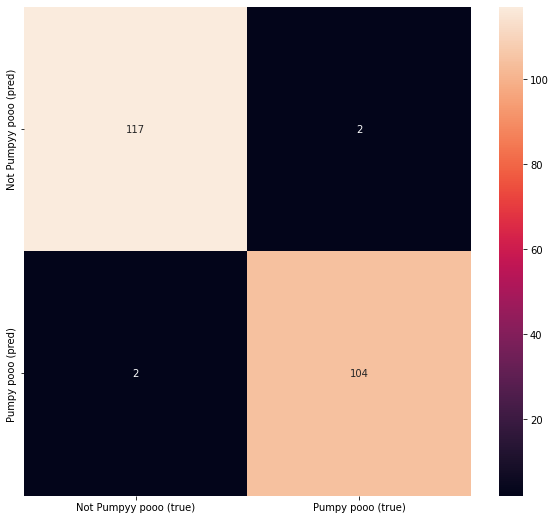

In [14]:
y_pred2 = model.predict(x_test)
y_pred_cls2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(y_test, axis=1)
conf_mat2 = confusion_matrix(y_true2, y_pred_cls2)
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat2, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()

[Text(0, 0.5, 'Not Pumpyy pooo (pred)'), Text(0, 1.5, 'Pumpy pooo (pred)')]

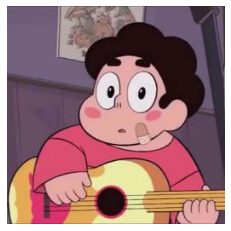

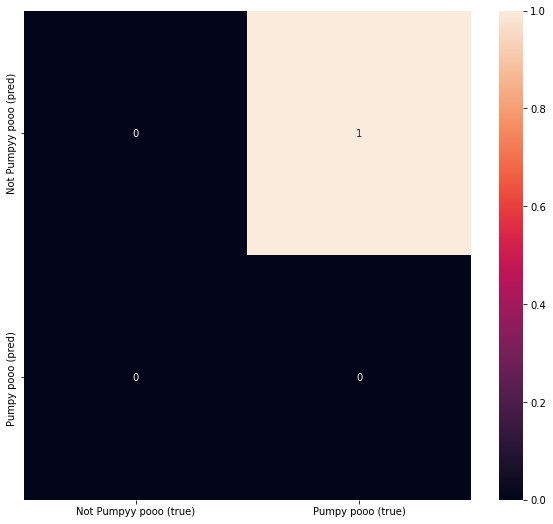

In [28]:
# URL IMAGE WORK

def get_check():
    global img_size

    fd = urlopen("https://c-cl.cdn.smule.com/rs-s87/arr/f8/65/e4b2a575-fbf4-4611-8f10-643c4b94bac6.jpg")
    # print(type(fd))  # debag
    image_file = io.BytesIO(fd.read())
    img = Image.open(image_file)
    img_arr = np.array(img)
    img_arr[20,30]
    plt.axis('off')

    # print(img_arr.shape)  # debag

    img_arr = cv2.resize(img_arr, dsize=(img_size, img_size))

    # print(img_arr.shape)  # debag
    # print(img_arr[0])  # debag
    plt.imshow(img_arr)  # debag

    img_arr = img_arr.reshape(-1, img_size, img_size, 3)
    img_arr = img_arr/255

    # print(img_arr.shape)  # debag
    # print(img_arr[0])  # debag
    return img_arr


# get_check()

y_pred = model.predict(get_check())
y_pred_cls = np.argmax(y_pred, axis=1)
# print('y_pred_cls: ',y_pred_cls)
# print([round(item) for item in y_pred_cls])
# s = 'Its Steven' if [round(item) for item in y_pred_cls] == [1, 0] else 'Its ISS'
# print(s)
y_true = np.argmax([[1, 0]], axis=1)
# print(y_true)
conf_mat = confusion_matrix(y_true, y_pred_cls)
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
# plt.show()
# print(y_pred)
# можно загрузить фотку по ссылке на диск
# и с диска работать по уже готовому коду
